In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np

pplib.imports()

In [21]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/11-20_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [22]:
ds.printMatching({'post_process':'obs_bias', 'color':'resolved', 'denominator':'ptl'})

In [23]:
from figrid.data_container import DataContainer
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'space':'real', 'mas':'CICW', 'path':'fiducial', 'simname':'tng100'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': 'resolved',
      'space':'real', 'fieldname':'galaxy',
     'path':'fiducial', 'simname':'tng100'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    ptlip['snapshot'] = s
    galip['snapshot'] = s
    
    ptls = ds.getMatching(ptlip)
    gals = ds.getMatching(galip)
    if len(ptls) > 1:
        ds.printMatching(ptlip)
    
    if len(gals) > 1:
        ds.printMatching(galip)
        
    xdata = ptls[0].getData()[0]
    ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
    ydata = np.sqrt(ydata)
    dc = DataContainer([xdata, ydata])
    dc.update(ptlip)
    dc.update(galip)
    dc.update({'censat':'both'})
    dc.add('post_process', 'obs_bias')
    dc.add('is_auto', False)
    dc.add('denominator', 'ptl')
    dc.add('numerator', 'galaxy')
    resolved_biases.append(dc)


ds.extend(resolved_biases)
    

# Investigate

The row values for space: ['real']
The column values for snapshot: [99, 67, 50]


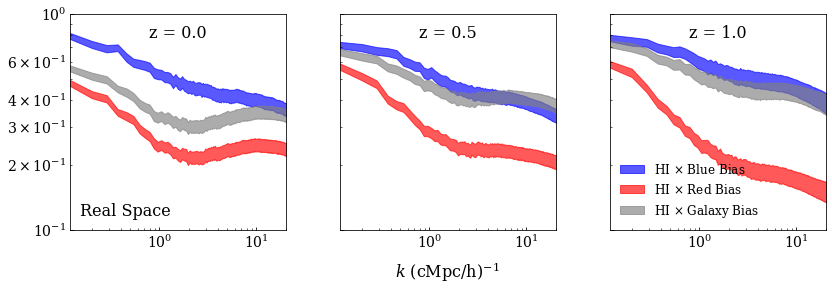

In [24]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':['real'],
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.autoFill()
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.1, 1))
fg.legendArgs(loc = 'lower left', fontsize = 12)
fg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


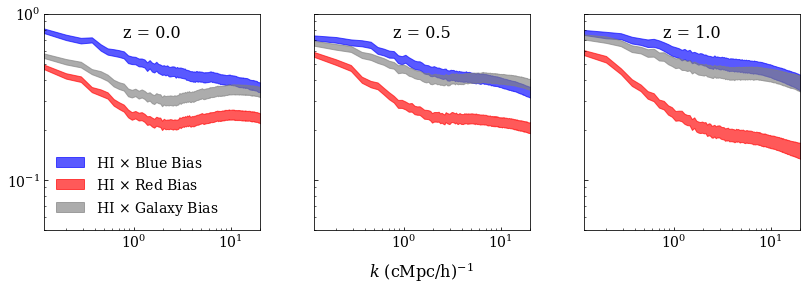

In [25]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', '', 'snapshot', ip)
fg.autoFill()
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({'loc':'lower left'}, (0, 0))
fg.rowLabelArgs(pos = [0.5, 0.95], textKwargs = {'ha':'center', 'va':'top', 'fontsize':16})
fg.plot()
# fg.save('HI-galaxy_bias_color_snapshotR.png')
# fg.save(DRAFTPATH%'HI-galaxy_obsbias_color_snapshotR.pdf')

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


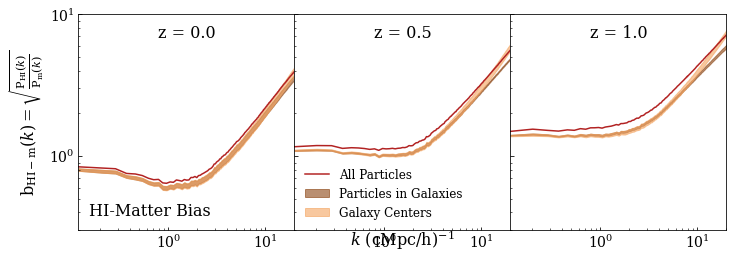

In [26]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl', 'hisubhalo'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("HI_fieldname", 'post_process', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.rowLabels(["HI-Matter Bias"])
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

# Paper Figures

The row values for post_process: ['theory_bias']
The column values for snapshot: [99, 67, 50]
blue 99
0.11866188299595938
1.0137491987205842
red 99
0.11866188299595938
1.68478764334301
blue 67
0.11866188299595938
1.5378241077990735
red 67
0.11866188299595938
1.9284282546591893
blue 50
0.11866188299595938
1.8429817057165478
red 50
0.11866188299595938
2.361400420237113


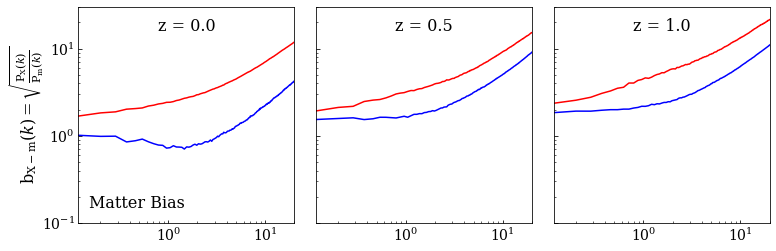

In [27]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)

bfg.rowLabels(["Matter Bias"])
bfg.gspecArgs(yborder = [0, 0.1], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.legendArgs(rm_legend=True)
bfg.setYLabel(pplib.obsbiaslab("X", "m"))
bfg.setXLabel('')
bfg.plot()
for j in range(3):
    for i in bfg.panels[0,j]:
        if 'figrid_process' not in i.attrs:
            print(i.attrs['color'], i.attrs['snapshot'])
#             idx = np.argmin(np.abs(i.data[0] - 0.24))
            print(i.data[0][0])
            print(i.data[1][0])

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]
0.8046400523309505
1.09707576579762
1.4053331235939284


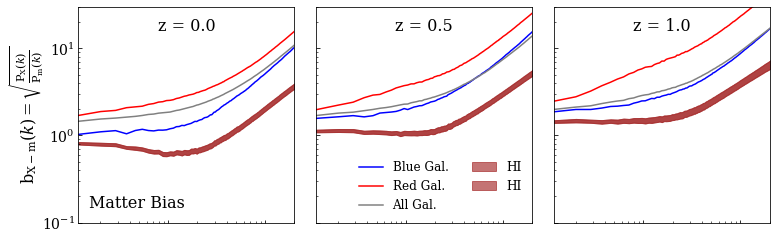

<Figure size 810x270 with 0 Axes>

In [15]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("post_processing", '', 'snapshot', ip)
hifg.rowLabels([""])
hifg.colLabels([""]*4)
hifg.tickArgs(labelbottom = False)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot(axes = bfg.axes)
for j in range(3):
    biases = []
    for i in hifg.panels[0,j]:
        
        if 'figrid_process' not in i.attrs:
            biases.append(i.data[1][0])
    biases = np.array(biases)
    print(np.median(biases))
bfg.fig

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50]
blue
0.28597202486091156
0.9940409124838282 0.9711043110985954
red
0.28597202486091156
0.9316374245129481 0.7725412004915325
resolved
0.28597202486091156
0.9896273124636575 0.945766284951828
blue
0.28597202486091156
0.9904190695807924 0.9539451907465394
blue
0.28597202486091156
0.9908619445587185 0.9551963814591559
blue
0.28597202486091156
0.9904424845618821 0.9504805576871234
blue
0.28597202486091156
0.9912604944372824 0.9516628783084458
red
0.28597202486091156
0.9257583400627207 0.750283934231649
red
0.28597202486091156
0.9265144268205612 0.7537314544057374
red
0.28597202486091156
0.9263825832521555 0.7544438308841893
red
0.28597202486091156
0.9270329646073119 0.7623696859845465
resolved
0.28597202486091156
0.9852464991671178 0.9258661709124979
resolved
0.28597202486091156
0.9857937840485963 0.9279932209325092
resolved
0.28597202486091156
0.9854576914651616 0.9250542973700916
resolved
0.285972

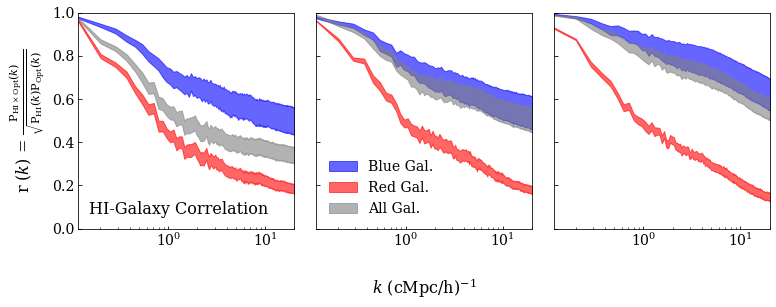

In [12]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'real', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Opt"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()
for i in ccfg.panels[0,2]:
    if 'figrid_process' not in i.attrs:
        print(i.attrs['color'])
        idx = np.argmin(np.abs(i.data[0] - 0.31))
        print(i.data[0][idx])
        print(i.data[1][0], i.data[1][idx])

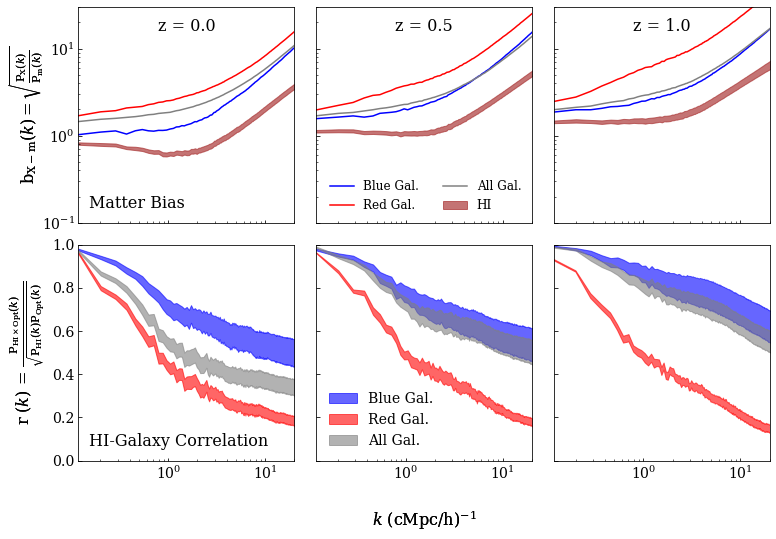

In [13]:
figarr = np.empty((2,1), dtype = object)
figarr[0,0] = bfg
figarr[1,0] = ccfg

fig = bfg.combine(figarr)
hifg.plot(axes = bfg.axes)
fig.savefig("color_post_processR_snapshotC.png", bbox_inches = 'tight')
fig.savefig("/Users/cosinga/code/hicolor_draft_two/figures/color_post_processR_snapshotC.pdf", dpi = 150, bbox_inches = 'tight')



The row values for post_process: ['obs_bias']
The column values for snapshot: [99]
[0.6240601503759399, 0]
[0, 0.5454545454545454]
The row values for : ['no key found']
The column values for snapshot: [99]
[0.6, 0]
[0, 0.6]


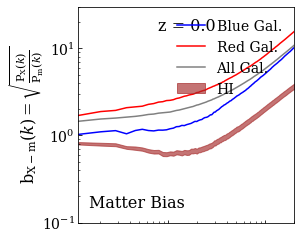

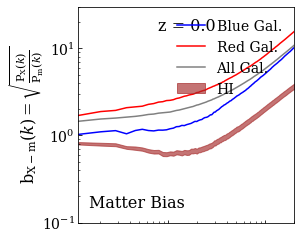

<Figure size 270x270 with 0 Axes>

## Presentation Figures

The row values for : ['no key found']
The column values for snapshot: [50]
[0.6240601503759399, 0]
[0, 0.6240601503759399]


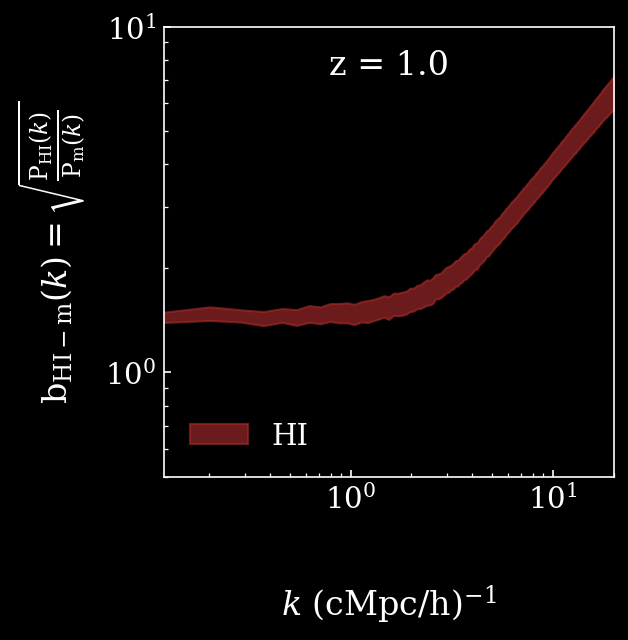

In [21]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("post_processing", '', 'snapshot', ip)
pplib.darkmode(hifg)

hifg.rowLabels([""])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.colLabels(["z = 1.0"])
hifg.legendArgs(loc = 'lower left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for : ['no key found']
The column values for : ['no key found']
[0.6240601503759399, 0]
[0, 0.6240601503759399]


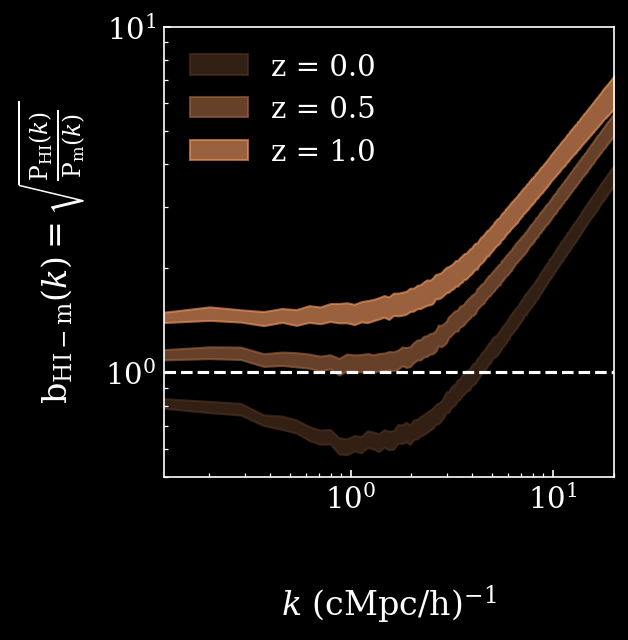

In [26]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50, 67, 99], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("snapshot", '', '', ip)
pplib.darkmode(hifg)
ip['snapshot'].reverse()
hifg.rowLabels([""])
hifg.setCmap('copper', ip['snapshot'])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.legendArgs(loc = 'upper left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
hifg.plotOnes(color = 'white')
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]
[0.5495495495495496, 0]
[0, 0.6]


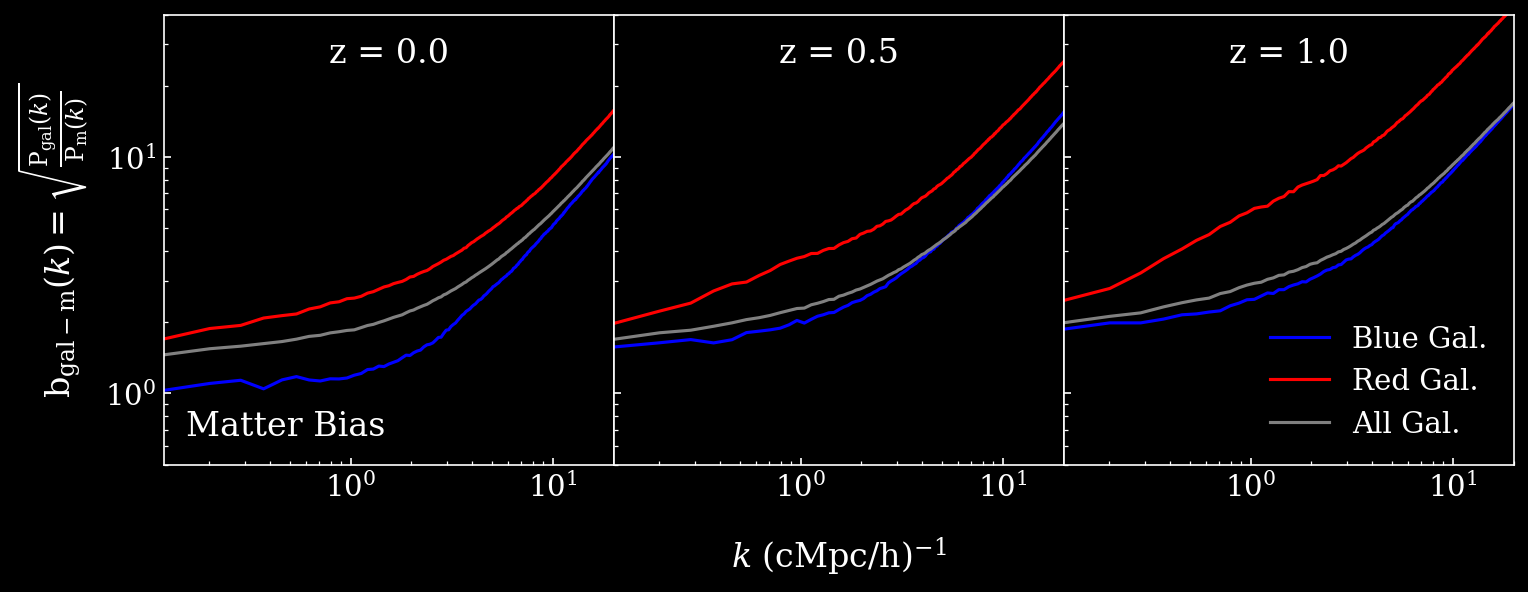

In [31]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)

bfg.rowLabels(["Matter Bias"])
bfg.gspecArgs(yborder = [0, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.5, 40))
bfg.legendArgs(loc = 'lower right')
bfg.setYLabel(pplib.obsbiaslab("gal", "m"))
pplib.darkmode(bfg)
bfg.plot()